# Assignment-02, Probability Model A First Look: An Introduction of Language Model

## Assignment

1. Review the course online programming code; 
2. Review the main questions; 
3. Using wikipedia corpus to build a language model. 

## 1. Review the course online programming code. 

*In this part, you should re-code the programming task in our online course.*

- 使用wikipedia语料库构建语言模型的过程中参考了课程中的代码。

## 2. Review the main points of this lesson. 

##### 1. How to Github and Why do we use Jupyter and Pycharm; 

- **Jupyter and Pycharm** ： 
    - Jupyter拥有交互式组件，支持交互式编程, 结果直接产生在Cell下面。可以添加各种元素,比如图片,视频, 链接, Markdown、LaTeX文档(比代码注释要好看), 相当于PPT。Jupyter Notebook就像是一张草稿纸，我们可以通过它来进行思考和探索的过程，并且可以交互式地进行，能够查看每一步的结果，可以将.pynb文件可视化展示给别人。
    - 缺点就是缺乏Pycharm 这类IDE所具有的函数跳转，debug等功能，代码的维护困难。Pycharm是一个功能强大的IDE，具有调试、语法高亮、Project管理、代码跳转、智能提示、自动完成、单元测试、版本控制等功能。可以提高开发人员的开发效率，适合用于大型项目的开发。

- **Github**:
    - 如何使用 GitHub？-知乎 https://www.zhihu.com/question/20070065

    - Git常用命令总结：http://www.cnblogs.com/cspku/articles/Git_cmds.html

##### 2. What's the Probability Model?

- 通过已知的知识来推理未知的事情

##### 3. Can you came up with some sceneraies at which we could use Probability Model?

- 超市货架上的商品摆放顺序对销量的影响

##### 4. Why do we use probability and what's the difficult points for programming based on parsing and pattern match? 


- 解析和模式匹配模型编程困难，当面对一个复杂的情景时，可能发生的情况难以考虑全面，或者造成程序开销过大。

##### 5. What's the Language Model;

- 语言模型就是用来计算一个句子的概率的模型

#####  6. Can you came up with some sceneraies at which we could use Language Model?

- 机器翻译，语音识别，音字转换等

##### 7. What's the 1-gram language model;

- 即句子中每个词出现的联合概率

##### 8. What's the disadvantages and advantages of 1-gram language model;

- **优点：**模型开销小，简单


- **缺点：**没有考虑句子中的上下文关系

##### 9.  What't the 2-gram models; 

- 句子中的词出现的概率与前一个词有关

##### 10. what's the web crawler, and can you implement a simple crawler? 

- 自动化抓取网页信息的程序较网络爬虫

In [123]:
import requests

In [124]:
url = 'https://movie.douban.com/'
response = requests.get(url)

In [129]:
html_content= response.text
image_pattern = re.compile('https://img3.doubanio.com/view/photo/s_ratio_poster/public/\w\d+.\w+')
image_pattern.findall(html_content)

['https://img3.doubanio.com/view/photo/s_ratio_poster/public/p2551353482.jpg',
 'https://img3.doubanio.com/view/photo/s_ratio_poster/public/p2550873121.jpg',
 'https://img3.doubanio.com/view/photo/s_ratio_poster/public/p2551249211.jpg',
 'https://img3.doubanio.com/view/photo/s_ratio_poster/public/p2552608202.jpg',
 'https://img3.doubanio.com/view/photo/s_ratio_poster/public/p2553090666.jpg',
 'https://img3.doubanio.com/view/photo/s_ratio_poster/public/p2549234765.jpg',
 'https://img3.doubanio.com/view/photo/s_ratio_poster/public/p2552522615.jpg',
 'https://img3.doubanio.com/view/photo/s_ratio_poster/public/p2551172384.jpg',
 'https://img3.doubanio.com/view/photo/s_ratio_poster/public/p2549558913.jpg',
 'https://img3.doubanio.com/view/photo/s_ratio_poster/public/p2552614343.jpg',
 'https://img3.doubanio.com/view/photo/s_ratio_poster/public/p2549523952.jpg',
 'https://img3.doubanio.com/view/photo/s_ratio_poster/public/p2545472803.jpg',
 'https://img3.doubanio.com/view/photo/s_ratio_poste

##### 11.  There may be some issues to make our crwaler programming difficult, what are these, and how do we solve them?

- 需要分析网页的结构，不同网站网页结构差异大。网站更新，爬虫程序通常也要更新。

- 很多网站都具有反爬虫机制，解决的方法有使用代理IP等

##### 12. What't the Regular Expression and how to use?

- 正则表达式参考文档：http://www.regexlab.com/zh/regref.htm

## 3. Using Wikipedia dataset to finish the language model. 

Step 1: You need to download the corpus from wikipedis:
> https://dumps.wikimedia.org/zhwiki/20190401/

Step 2: You may need the help of wiki-extractor:

> https://github.com/attardi/wikiextractor

Step 3: Using the technologies and methods to finish the language model; 
> 

In [72]:
import json
import re
import jieba
import numpy as np
from functools import reduce
from hanziconv import HanziConv
from collections import Counter

import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
wiki_data_dir = './data/text/AA/wiki_00'

In [44]:
def load_data(in_file):
    all_text = []
    with open(wiki_data_dir, 'r', encoding='utf-8') as f:
        for line in f:
            data = json.loads(line.strip())
            text = HanziConv.toSimplified(data['text'])
            all_text.append(' '.join(re.findall('[\w|\d]+', text)))
    return all_text

In [45]:
text = load_data(wiki_data_dir)

In [55]:
TEXT = ' '.join(text)
print(len(TEXT))

35845102


In [57]:
def cut(string): return list(jieba.cut(string))

In [63]:
# test
cut(TEXT[20:30])

['变化', '以及', '空间', '等', '概念', '的']

In [64]:
ALL_TOKENS = cut(TEXT)
len(ALL_TOKENS)

In [65]:
valida_tokens = [t for t in ALL_TOKENS if t.strip() and t != 'n']
len(valida_tokens)

16973207

## Get the frequences of words

In [67]:
words_count = Counter(valida_tokens)
words_count.most_common(10)

[('的', 987355),
 ('在', 256019),
 ('年', 206054),
 ('是', 183129),
 ('和', 158106),
 ('了', 125870),
 ('为', 116219),
 ('与', 91553),
 ('有', 87926),
 ('月', 86180)]

In [69]:
frequences = [f for w, f in words_count.most_common(100)]
x = [i for i in range(len(frequences[:100]))]

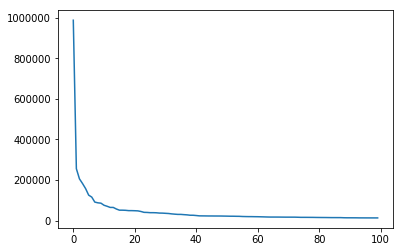

In [71]:
plt.plot(x, frequences)

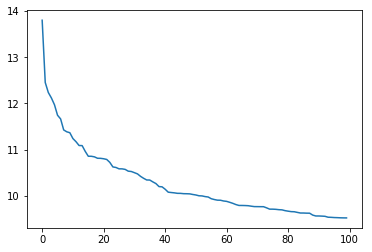

In [74]:
plt.plot(x, np.log(frequences))

In [75]:
frequences_all = [f for w, f in words_count.most_common()]
frequences_sum = sum(frequences_all)
print(frequences_sum)

16973207


In [80]:
def get_prob(word): 
    esp = 1 / frequences_sum
    if word in words_count: 
        return words_count[word] / frequences_sum
    else:
        return esp

def product(numbers):
    return reduce(lambda n1, n2: n1 * n2, numbers)

def language_model_one_gram(string):
    words = cut(string)
    return product([get_prob(w) for w in words])

In [85]:
language_model_one_gram('数学是一门有趣学科')

1.2240325170072638e-19

## 2-Gram

In [92]:
all_2_grams_words = [''.join(valida_tokens[i:i+2]) for i in range(len(valida_tokens[:-2]))]

In [101]:
_2_gram_sum = len(all_2_grams_words)
_2_gram_counter = Counter(all_2_grams_words)

def get_combination_prob(w1, w2):
    if w1 + w2 in _2_gram_counter: return _2_gram_counter[w1+w2] / _2_gram_sum
    else:
        return 1 / _2_gram_sum
    
def get_prob_2_gram(w1, w2):
    return get_combination_prob(w1, w2) / get_prob(w1)

In [111]:
get_combination_prob('文本', '处理')

5.891639204263426e-08

In [112]:
get_prob_2_gram('图像', '处理')

0.0012437812410855524

In [105]:
def langauge_model_of_2_gram(sentence):
    sentence_probability = 1    
    words = cut(sentence)    
    for i, word in enumerate(words):
        if i == 0: 
            prob = get_prob(word)
        else:
            previous = words[i-1]
            prob = get_prob_2_gram(previous, word)
        sentence_probability *= prob
    
    return sentence_probability

In [114]:
langauge_model_of_2_gram('数学是一门有趣的学科')

5.546454259389739e-16

**Step 4:** Try some interested sentence pairs, and check if your model could fit them

In [118]:
langauge_model_of_2_gram('计算机学科很有趣')

3.294726795156638e-13

In [121]:
langauge_model_of_2_gram('计算机专业很有趣')

9.375850003720383e-11

In [122]:
langauge_model_of_2_gram('计算机专业很无聊')

1.4424384621108282e-11

In [120]:
langauge_model_of_2_gram('发动机专业很无聊')

6.512138293803016e-15

Step 5: If we need to solve following problems, how can language model help us? 

+ Voice Recognization.
+ Sogou *pinyin* input.
+ Auto correction in search engine. 
+ Abnormal Detection.

### Compared to the previous learned parsing and pattern match problems. What's the advantage and disavantage of Probability Based Methods? 

- **优点：**基于概率的方法编程简单，能够面对更加复杂的情况

- **缺点：**在语料库不是很完备的时候结果较差

## (Optional)  How to solve *OOV* problem?

If some words are not in our dictionary or corpus. When we using language model, we need to overcome this `out-of-vocabulary`(OOV) problems. There are so many intelligent man to solve this probelm. 

-- 

The first question is: 

**Q1: How did you solve this problem in your programming task?**

- 在语料库中加入一个 UNK 词，代替所有OOV

Then, the sencond question is: 

**Q2: Read about the 'Turing-Good Estimator', can explain the main points about this method, and may implement this method in your programming task**

Reference: 
+ https://www.wikiwand.com/en/Good%E2%80%93Turing_frequency_estimation
+ https://github.com/Computing-Intelligence/References/blob/master/NLP/Natural-Language-Processing.pdf, Page-37

> coding in here